In [1]:
import math
import collections

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_rows=8

In [3]:
import zipfile

In [4]:
zipfile.ZipFile('names.zip').extractall('.')

In [5]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 36D4-134F

 Directory of C:\Users\Rajiv Subramanyam V

05/18/2020  11:45 PM    <DIR>          .
05/18/2020  11:45 PM    <DIR>          ..
04/24/2019  07:44 PM    <DIR>          .azurefunctions
09/03/2018  04:50 PM    <DIR>          .config
09/07/2018  02:36 PM             1,038 .csslintrc
05/05/2019  08:14 PM    <DIR>          .dotnet
06/11/2019  11:00 PM                56 .gitconfig
04/18/2020  07:35 PM    <DIR>          .idlerc
05/13/2020  11:19 PM    <DIR>          .ipynb_checkpoints
01/24/2020  06:44 PM    <DIR>          .ipython
01/26/2020  05:32 PM    <DIR>          .jupyter
04/09/2020  03:52 PM    <DIR>          .kaggle
07/30/2019  02:01 PM               715 .KJWizardJNI.prefs
07/30/2019  02:01 PM               842 .KJWizardJNIUser.prefs
04/01/2020  01:21 PM    <DIR>          .matplotlib
09/05/2019  08:25 PM    <DIR>          .nbi
02/10/2019  03:42 PM    <DIR>          .nuget
04/28/2019  05:16 PM               196 .packet

In [6]:
ls names

 Volume in drive C has no label.
 Volume Serial Number is 36D4-134F

 Directory of C:\Users\Rajiv Subramanyam V\names

05/18/2020  03:23 PM    <DIR>          .
05/18/2020  03:23 PM    <DIR>          ..
05/19/2020  03:12 PM           316,364 NationalReadMe.pdf
05/19/2020  03:12 PM            24,933 yob1880.txt
05/19/2020  03:12 PM            24,065 yob1881.txt
05/19/2020  03:12 PM            26,559 yob1882.txt
05/19/2020  03:12 PM            26,002 yob1883.txt
05/19/2020  03:12 PM            28,670 yob1884.txt
05/19/2020  03:12 PM            28,625 yob1885.txt
05/19/2020  03:12 PM            29,822 yob1886.txt
05/19/2020  03:12 PM            29,531 yob1887.txt
05/19/2020  03:12 PM            33,064 yob1888.txt
05/19/2020  03:12 PM            32,297 yob1889.txt
05/19/2020  03:12 PM            33,621 yob1890.txt
05/19/2020  03:12 PM            33,186 yob1891.txt
05/19/2020  03:12 PM            36,542 yob1892.txt
05/19/2020  03:12 PM            35,433 yob1893.txt
05/19/2020  03:12 PM      

In [7]:
open('names/yob2011.txt','r').readlines()[:10]

['Sophia,F,21842\n',
 'Isabella,F,19910\n',
 'Emma,F,18803\n',
 'Olivia,F,17322\n',
 'Ava,F,15503\n',
 'Emily,F,14258\n',
 'Abigail,F,13248\n',
 'Madison,F,12389\n',
 'Mia,F,11530\n',
 'Chloe,F,10991\n']

In [8]:
pd.read_csv('names/yob2011.txt', names=['name','sex','number']).assign(year=2011)

,name,sex,number,year
0,Sophia,F,21842,2011
1,Isabella,F,19910,2011
2,Emma,F,18803,2011
3,Olivia,F,17322,2011
...,...,...,...,...
33904,Zylas,M,5,2011
33905,Zyran,M,5,2011
33906,Zyshawn,M,5,2011
33907,Zytavion,M,5,2011


In [9]:
allyears = pd.concat(pd.read_csv(f'names/yob{year}.txt', names=['name','sex','number']).assign(year=year)
                     for year in range(1880, 2019))

In [10]:
allyears.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1957046 entries, 0 to 32032
Data columns (total 4 columns):
name      object
sex       object
number    int64
year      int64
dtypes: int64(2), object(2)
memory usage: 74.7+ MB


In [11]:
allyears.year.min()

1880

In [12]:
allyears.year.max()

2018

In [13]:
allyears.to_csv('allyears.csv.gz', index=False)

In [14]:
pd.options.display.max_rows = 6

In [15]:
allyears = pd.read_csv('allyears.csv.gz')

In [16]:
allyears

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
...,...,...,...,...
1957043,Zyrie,M,5,2018
1957044,Zyron,M,5,2018
1957045,Zzyzx,M,5,2018


In [17]:
allyears_indexed = allyears.set_index(['sex', 'name', 'year']).sort_index()

In [18]:
allyears_indexed.loc[('F','Mary')]

,number
year,
1880,7065
1881,6919
1882,8148
...,...
2016,2508
2017,2402
2018,2327


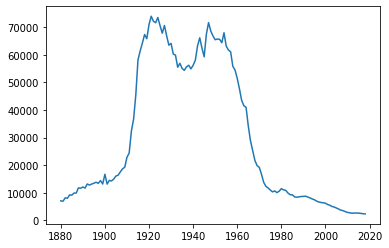

In [19]:
plt.plot(allyears_indexed.loc[('F','Mary')])

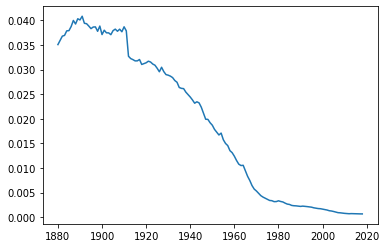

In [20]:
plt.plot(allyears_indexed.loc[('F','Mary')] / allyears.groupby('year').sum())

In [21]:

def plotname(sex, name):
    data = allyears_indexed.loc[(sex, name)]
    
    plt.plot(data.index, data.values, label=name)
    plt.axis(xmin = 1880, xmax = 2018)

In [22]:
def comparenames(sex, names):
    plt.figure(figsize=(12, 2.5))
    
    for name in names:
        plotname(sex, name)
        
    plt.legend()

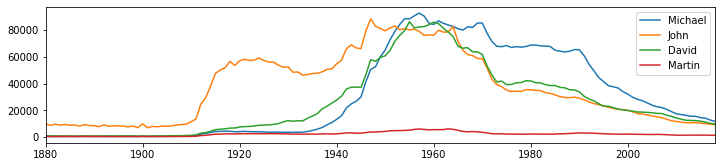

In [23]:
comparenames('M', ['Michael', 'John', 'David', 'Martin'])

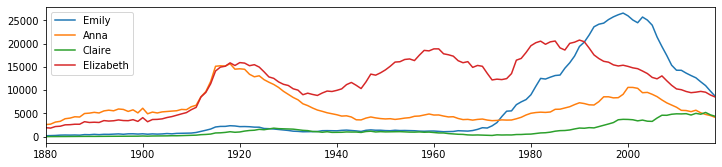

In [24]:
comparenames('F', ['Emily', 'Anna', 'Claire', 'Elizabeth'])

In [25]:
claires = ['Claire', 'Clare', 'Clara', 'Chiara', 'Ciara']

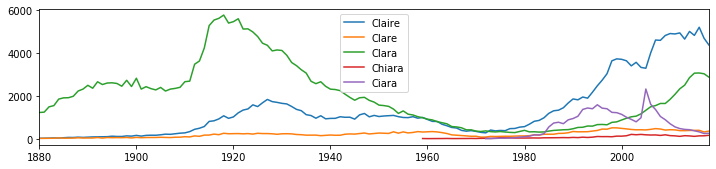

In [26]:


comparenames('F', claires)

In [27]:

allyears_indexed.loc[('F', claires), :]

number
sex name   year        
F   Chiara 1959       9
           1960       5
           1962       8
...                 ...
    Clare  2016     394
           2017     315
           2018     357

[522 rows x 1 columns]

In [28]:
allyears_indexed.loc[('F', claires), :].unstack(level=2)

number                                                          \
year          1880    1881    1882    1883    1884    1885    1886    1887   
sex name                                                                     
F   Chiara     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
    Ciara      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
    Claire    21.0    23.0    30.0    38.0    33.0    49.0    61.0    58.0   
    Clara   1226.0  1242.0  1490.0  1548.0  1852.0  1910.0  1916.0  1984.0   
    Clare     15.0    20.0    21.0    22.0    38.0    27.0    26.0    31.0   

                            ...                                          \
year          1888    1889  ...    2009    2010    2011    2012    2013   
sex name                    ...                                           
F   Chiara     NaN     NaN  ...   183.0   145.0   134.0   111.0   142.0   
    Ciara      NaN     NaN  ...   888.0   699.0   554.0   475.0   436.0   
    Claire    73.0    62.0  ...  4824.0  4915.0  4896.0  4944.0  4656.0   
    Clara   2230.0  2319.0  ...  1647.0  1840.0  2074.0  2333.0  2504.0   
    Clare     43.0    34.0  ...   405.0   421.0   414.0   379.0   377.0   

                                                    
year          2014    2015    2016    2017    2018  
sex name                                            
F   Chiara   131.0   111.0   134.0   137.0   160.0  
    Ciara    422.0   372.0   321.0   243.0   256.0  
    Claire  5014.0  4829.0  5209.0  4693.0  4379.0  
    Clara   2854.0  3064.0  3072.0  3035.0  2877.0  
    Clare    386.0   389.0   394.0   315.0   357.0  

[5 rows x 139 columns]

In [29]:
allyears_indexed.loc[('F', claires), :].unstack(level=1)

number                              
name     Chiara  Ciara  Claire   Clara  Clare
sex year                                     
F   1880    NaN    NaN    21.0  1226.0   15.0
    1881    NaN    NaN    23.0  1242.0   20.0
    1882    NaN    NaN    30.0  1490.0   21.0
...         ...    ...     ...     ...    ...
    2016  134.0  321.0  5209.0  3072.0  394.0
    2017  137.0  243.0  4693.0  3035.0  315.0
    2018  160.0  256.0  4379.0  2877.0  357.0

[139 rows x 5 columns]

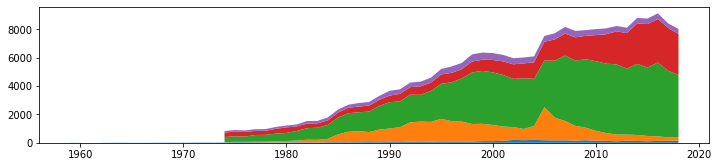

In [30]:
plt.figure(figsize=(12, 2.5))
plt.stackplot(range(1880, 2019),
              allyears_indexed.loc[('F', claires), :].unstack(level=2));             

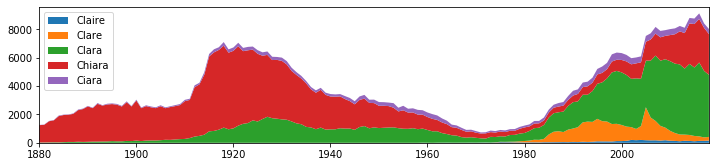

In [31]:
plt.figure(figsize=(12, 2.5))
plt.stackplot(range(1880, 2019),
              allyears_indexed.loc[('F', claires), :].unstack(level=2).fillna(0),
              labels=claires);
plt.legend(loc='upper left')
plt.axis(xmin=1880, xmax=2018);

In [32]:
allyears_byyear = allyears.set_index(['sex', 'year']).sort_index()

In [33]:
allyears_byyear.loc['M', 2018].sort_values('number', ascending=False)

name  number
sex year                 
M   2018     Liam   19837
    2018     Noah   18267
    2018  William   14516
...           ...     ...
    2018    Gavon       5
    2018   Gaurav       5
    2018    Zzyzx       5

[14004 rows x 2 columns]

In [34]:
allyears_byyear.loc['M', 2018].sort_values('number', ascending=False).head(10)

name  number
sex year                 
M   2018     Liam   19837
    2018     Noah   18267
    2018  William   14516
...           ...     ...
    2018    Lucas   12585
    2018    Mason   12435
    2018    Logan   12352

[10 rows x 2 columns]

In [35]:
allyears_byyear.loc['F', 2018].sort_values('number', ascending=False).head(10)

name  number
sex year                
F   2018    Emma   18688
    2018  Olivia   17921
    2018     Ava   14924
...          ...     ...
    2018  Amelia   12301
    2018  Harper   10582
    2018  Evelyn   10376

[10 rows x 2 columns]

In [36]:
allyears_byyear.loc['F', 2018].sort_values('number', ascending=False).head(10).reset_index().name

0      Emma
1    Olivia
2       Ava
      ...  
7    Amelia
8    Harper
9    Evelyn
Name: name, Length: 10, dtype: object

In [37]:
def getyear(sex, year):
    return (allyears_byyear.loc[sex, year].sort_values('number', ascending=False).head(10).reset_index().name)

In [38]:
pd.DataFrame({year: getyear('M', year) for year in range(2010, 2019)})

,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Jacob,Jacob,Jacob,Noah,Noah,Noah,Noah,Liam,Liam
1,Ethan,Mason,Mason,Jacob,Liam,Liam,Liam,Noah,Noah
2,Michael,William,Ethan,Liam,Mason,Mason,William,William,William
...,...,...,...,...,...,...,...,...,...
7,Daniel,Alexander,Jayden,Alexander,Alexander,Alexander,Michael,Elijah,Lucas
8,Aiden,Aiden,Alexander,Jayden,James,Michael,Elijah,Oliver,Mason
9,Anthony,Daniel,Aiden,Daniel,Daniel,Benjamin,Ethan,Jacob,Logan


In [39]:
pd.DataFrame({year: getyear('F', year) for year in range(2010, 2019)})

,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Isabella,Sophia,Sophia,Sophia,Emma,Emma,Emma,Emma,Emma
1,Sophia,Isabella,Emma,Emma,Olivia,Olivia,Olivia,Olivia,Olivia
2,Emma,Emma,Isabella,Olivia,Sophia,Sophia,Ava,Ava,Ava
...,...,...,...,...,...,...,...,...,...
7,Madison,Madison,Mia,Abigail,Abigail,Emily,Abigail,Amelia,Amelia
8,Chloe,Mia,Madison,Madison,Madison,Charlotte,Emily,Evelyn,Harper
9,Mia,Chloe,Elizabeth,Elizabeth,Charlotte,Harper,Harper,Abigail,Evelyn


In [40]:
def plotname(sex, name):
    data = allyears.query('sex == @sex and name == @name')
    
    plt.plot(data.year, data.number, label=name)
    plt.axis(xmin = 1880, xmax = 2018)

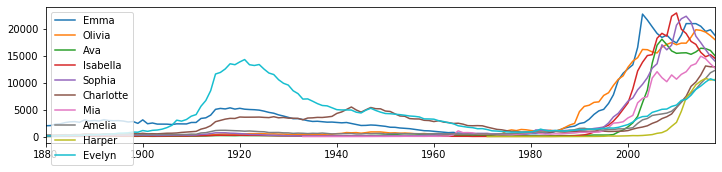

In [41]:
plt.figure(figsize=(12, 2.5))
    
for name in getyear('F', 2018):
        plotname('F', name)
        
plt.legend()

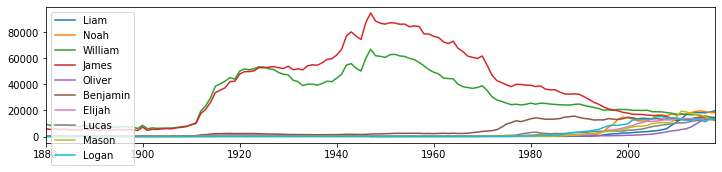

In [42]:
plt.figure(figsize=(12, 2.5))
    
for name in getyear('M', 2018):
        plotname('M', name)
        
plt.legend()

In [43]:
list(getyear('M', 2018))

['Liam',
 'Noah',
 'William',
 'James',
 'Oliver',
 'Benjamin',
 'Elijah',
 'Lucas',
 'Mason',
 'Logan']

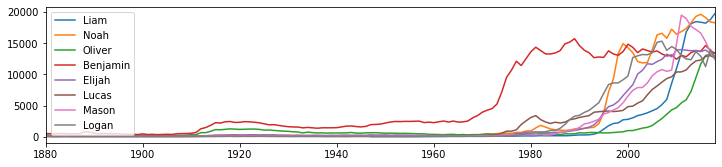

In [44]:
plt.figure(figsize=(12, 2.5))
    
for name in ['Liam', 'Noah', 'Oliver', 'Benjamin', 'Elijah', 'Lucas', 'Mason', 'Logan']:
        plotname('M', name)
        
plt.legend()

In [45]:
alltime_f = allyears_byyear.loc['F'].groupby('name').sum().sort_values('number', ascending=False).head(10)

In [46]:
alltime_f

,number
name,
Mary,4125675
Elizabeth,1638349
Patricia,1572016
...,...
Susan,1121703
Dorothy,1107635
Sarah,1077746


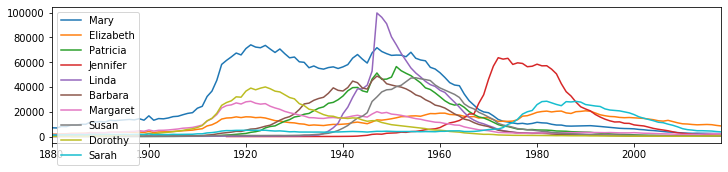

In [47]:
plt.figure(figsize=(12, 2.5))
    
for name in alltime_f.index:
        plotname('F', name)
        
plt.legend()

In [48]:
allyears

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
...,...,...,...,...
1957043,Zyrie,M,5,2018
1957044,Zyron,M,5,2018
1957045,Zzyzx,M,5,2018


In [55]:
# Top 10 unisex names:
totals = allyears.groupby(['sex','name']).number.sum()
totals

sex  name     
F    Aabha        35
     Aabidah       5
     Aabriella    38
                  ..
M    Zyvon         7
     Zyyon         6
     Zzyzx        10
Name: number, Length: 109173, dtype: int64

In [58]:
#Total Males
male = totals.loc['M']
male

name
Aaban    114
Aabid     16
Aabir     10
        ... 
Zyvon      7
Zyyon      6
Zzyzx     10
Name: number, Length: 41475, dtype: int64

In [59]:
#Total Females
female = totals.loc['F']
female

name
Aabha        35
Aabidah       5
Aabriella    38
             ..
Zyriyah      16
Zyva         23
Zyyanna       6
Name: number, Length: 67698, dtype: int64

In [60]:
totals.loc['M'] / totals.loc['F'] < 2

name
Aaban      False
Aabha      False
Aabid      False
           ...  
Zyyanna    False
Zyyon      False
Zzyzx      False
Name: number, Length: 98400, dtype: bool

In [61]:
ratio = (totals.loc['M'] / totals.loc['F']).dropna()
ratio

name
Aaden    965.600000
Aadi      53.187500
Aadyn     32.250000
            ...    
Zyonn      8.000000
Zyree      5.875000
Zyrie      0.842105
Name: number, Length: 10773, dtype: float64

In [63]:
ratio[(ratio > 0.5) & (ratio < 2)]

name
Aalijah    1.422819
Aamari     1.430233
Aari       1.111111
             ...   
Zohar      0.520270
Zyian      0.714286
Zyrie      0.842105
Name: number, Length: 1660, dtype: float64

In [65]:
unisex = ratio[(ratio > 0.5) & (ratio < 2)].index
unisex

Index(['Aalijah', 'Aamari', 'Aari', 'Aarin', 'Aaris', 'Aaryn', 'Aavyn', 'Abey',
       'Abrar', 'Abriel',
       ...
       'Zell', 'Zi', 'Ziel', 'Zihan', 'Zixuan', 'Ziyan', 'Zoel', 'Zohar',
       'Zyian', 'Zyrie'],
      dtype='object', name='name', length=1660)

In [66]:
common = (male.loc[unisex] + female.loc[unisex]).sort_values(ascending=False).head(10)
common

name
Jessie     277674
Riley      201179
Casey      186947
            ...  
Kendall     93317
Jody        86971
Frankie     74325
Name: number, Length: 10, dtype: int64

In [68]:
allyears_indexed = allyears.set_index(['sex', 'name', 'year']).sort_index()

In [69]:
allyears_indexed

number
sex name  year        
F   Aabha 2011       7
          2012       5
          2014       9
...                ...
M   Zyyon 2014       6
    Zzyzx 2010       5
          2018       5

[1957046 rows x 1 columns]

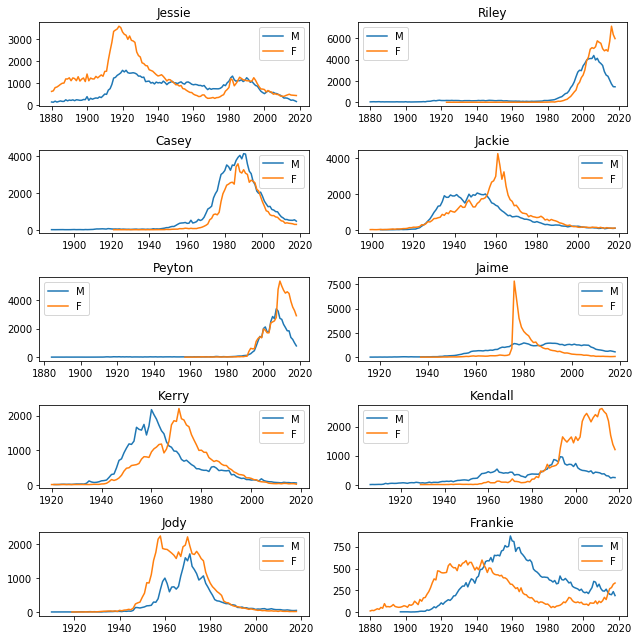

In [74]:
plt.figure(figsize=(9,9))

for i, name in enumerate(common.index):
    plt.subplot(5,2,i+1)
    
    plt.plot(allyears_indexed.loc['M', name], label='M')
    plt.plot(allyears_indexed.loc['F', name], label='F')
    
    plt.legend()
    plt.title(name)
    
plt.tight_layout()